# **A Basic Example of Python**

In [1]:
####################

import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

####################

rng = np.random.default_rng(seed=42)  # Meaning of Life

In [2]:
##################################
### QPSK Constellation Plotter ###
##################################


## Signal Generation ##

num_symbols = 1000

x_int = rng.integers(0, 4, num_symbols)  # 0 to 3 random symbol set

x_degrees = x_int*360/4.0 + 45     # 45, 135, 225, 315 degrees because I don't like complex math
x_radians = x_degrees*np.pi/180.0  # sin() and cos() takes in radians

x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians)  # Produce QPSK complex symbols



## Add Noise and Plot ##

@interact(awgn=(0.0,1.0,0.01),phase=(0.0,1.0,0.01))
def signal_with_noise(awgn=0.0, phase=0.0):
    ## Noise Generation ##

    # AWGN with unity power
    n = (rng.integers(num_symbols) + 1j*rng.integers(num_symbols))/np.sqrt(2)
    noise_power = awgn

    # Phase Noise
    phase_noise = rng.integers(len(x_symbols)) * phase

    # Add noise to signal
    recv = (x_symbols * np.exp(1j*phase_noise)) + (n * np.sqrt(noise_power))

    plt.plot(np.real(recv), np.imag(recv), '.')
    plt.grid(True)
    plt.show()


## Alternative method to decorator - toggle comments with decorator to use
# interactive_plot = widgets.interactive(signal_with_noise)
# output = interactive_plot.children[-1]
# interactive_plot

interactive(children=(FloatSlider(value=0.0, description='awgn', max=1.0, step=0.01), FloatSlider(value=0.0, d…

# **Background**

## Digital Signals

Digital signals use symbols to represent one or more bits of information.

Generaly, we want to transmit the most data with the least spectrum.

---

The frequency domain tells us how much spectrum/bandwidth our signal will use.

We usually want to maxamize throughput and minimize spectrum use.

---

Why can't we just transmit binary data at a faster speed?

## Time-Frequency Pairs

### Constant Signal

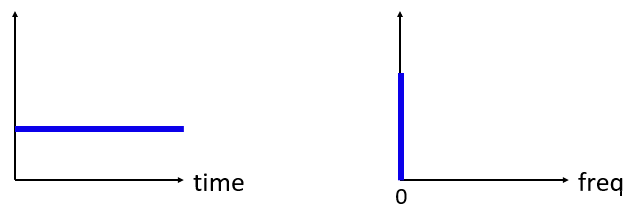

Because there is no frequency, in the frequency domain we have a spike at 0 Hz ("DC").

### Sinusoidal Wave

![]()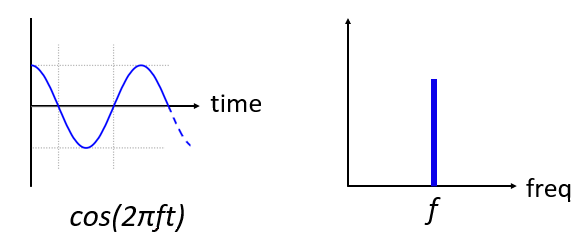

*Key Point*: The signal has a single frequency, which is why we see a single peak(impulse) in the frequency domain.

### Unit Impulse

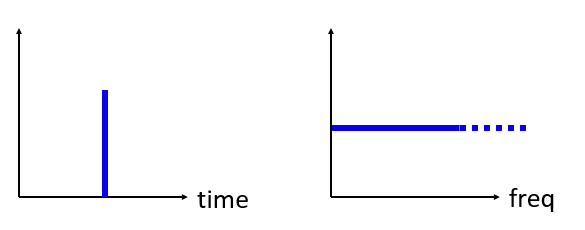

An impulse in the time domain is a horizontal line (all frequencies) in the frequency domain.

Note that the signal theoretically contains every frequency, although it would have to be infinently short in the time domain for this to occur.

*Key Point*: Quick changes in the time domain result in many frequencies occurring.

## Fourier Properties

*Time Scaling Property*

Scaling in the time domain causes inverse scaling in the frequency domain.

</br>

$\mathcal{F}\big(x(at)\big) = \frac{1}{|a|}X\left(j\frac{\omega}{a}\right)$

</br>

time-scaling.svg

Transmitting 1’s and 0’s faster will increase the bandwidth of our signal and create undesireable frequency components.

## Modulation

Our goal: to maximize “spectral efficiency” in units of bits/sec/Hz.

We do this with modulation.

Modify the properties of a sinusoid(the carrier) to transmit information.

* Amplitude
* Phase
* Frequency

Using schemes such as:
*   ASK
*   PSK
*   FSK
*   QAM

The spectral characteristics (frequency domain) of the baseband symbols do not change when we modulate a carrier.

Carrier modulation just shifts the baseband up in frequency while the shape stays the same.

*The amount of bandwidth we use stays the same.*

# **Inter-Symbol-Interference (ISI)**

## Definition

ISI occurs when a symbol interferes with subsequent symbols.

</br>

This causes distortion similar to noise and potentially introduces error in the receiver decision device.

Successive symbols appear to "blur" or "bleed" together.

## Causes

* Bandlimited Channel
    * Channel Frequency Response Characteristics
    * Artificial Restrictions (spectrum allocation)
* Multipath Propogation
    * Reflection
    * Refraction
    * Atmospheric Ducting
    * Ionospheric Reflection

multipath.svg

multipath2.svg

## BPSK Multipath Eye Diagram

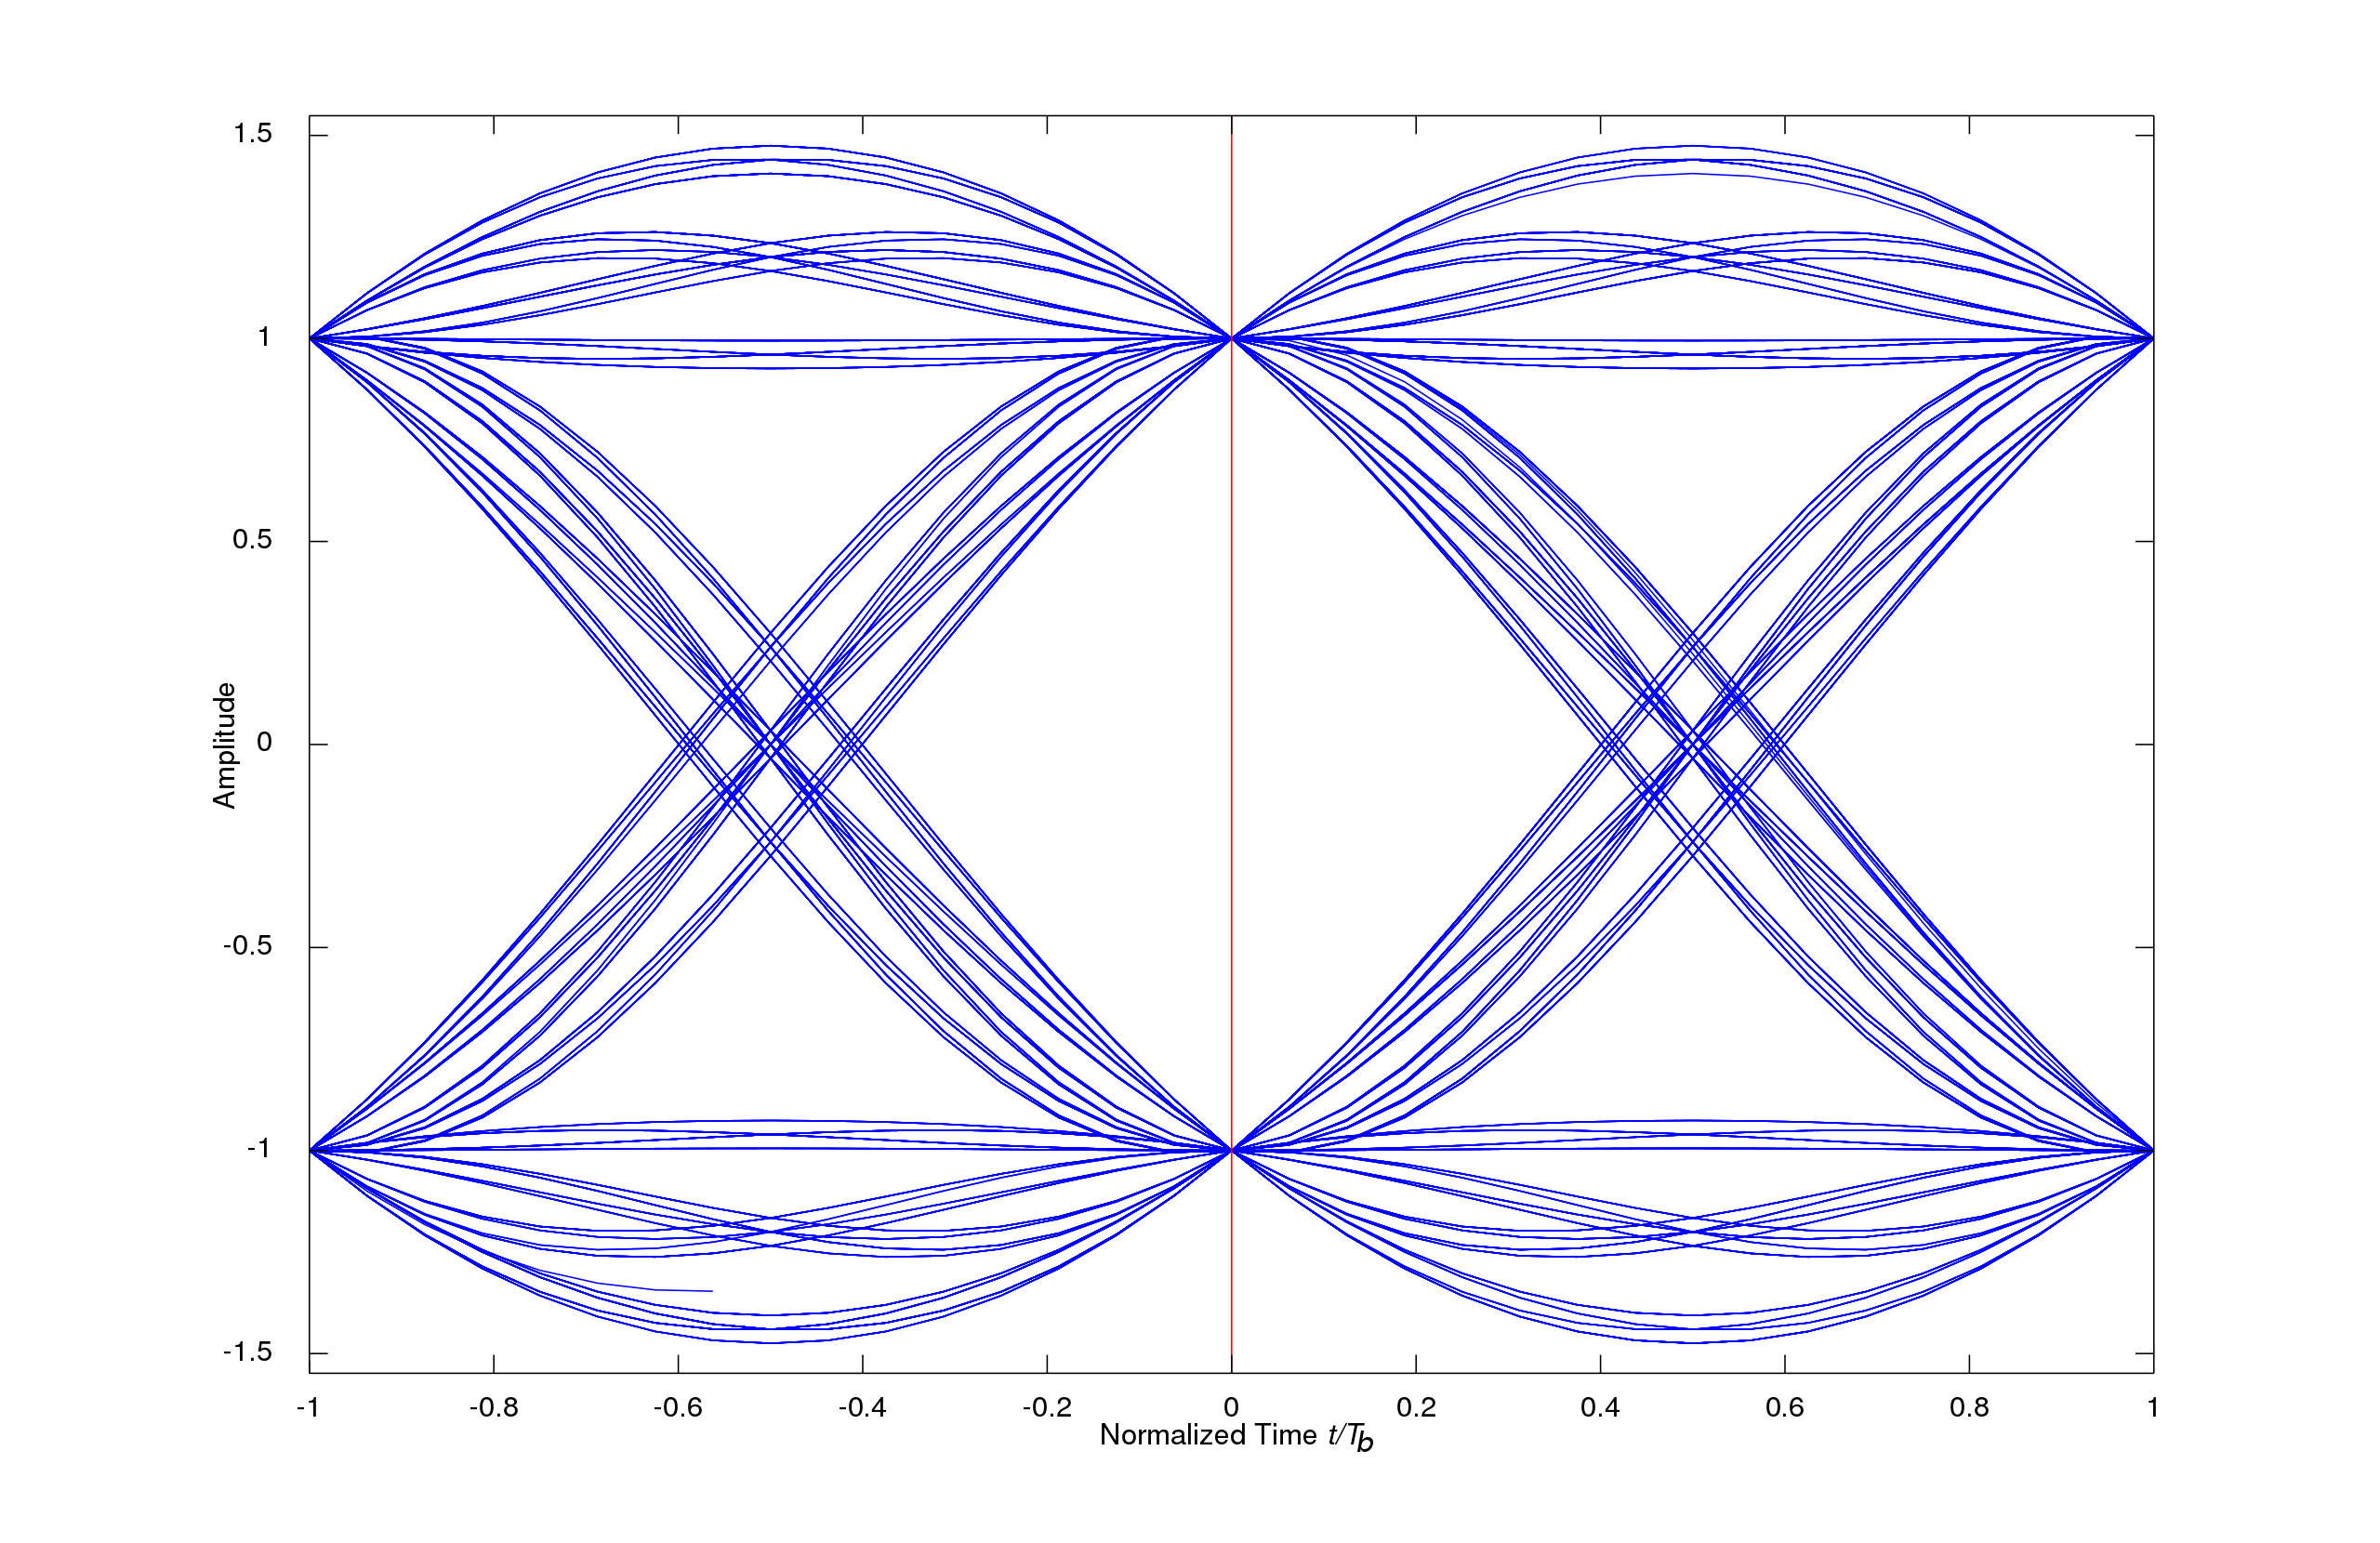

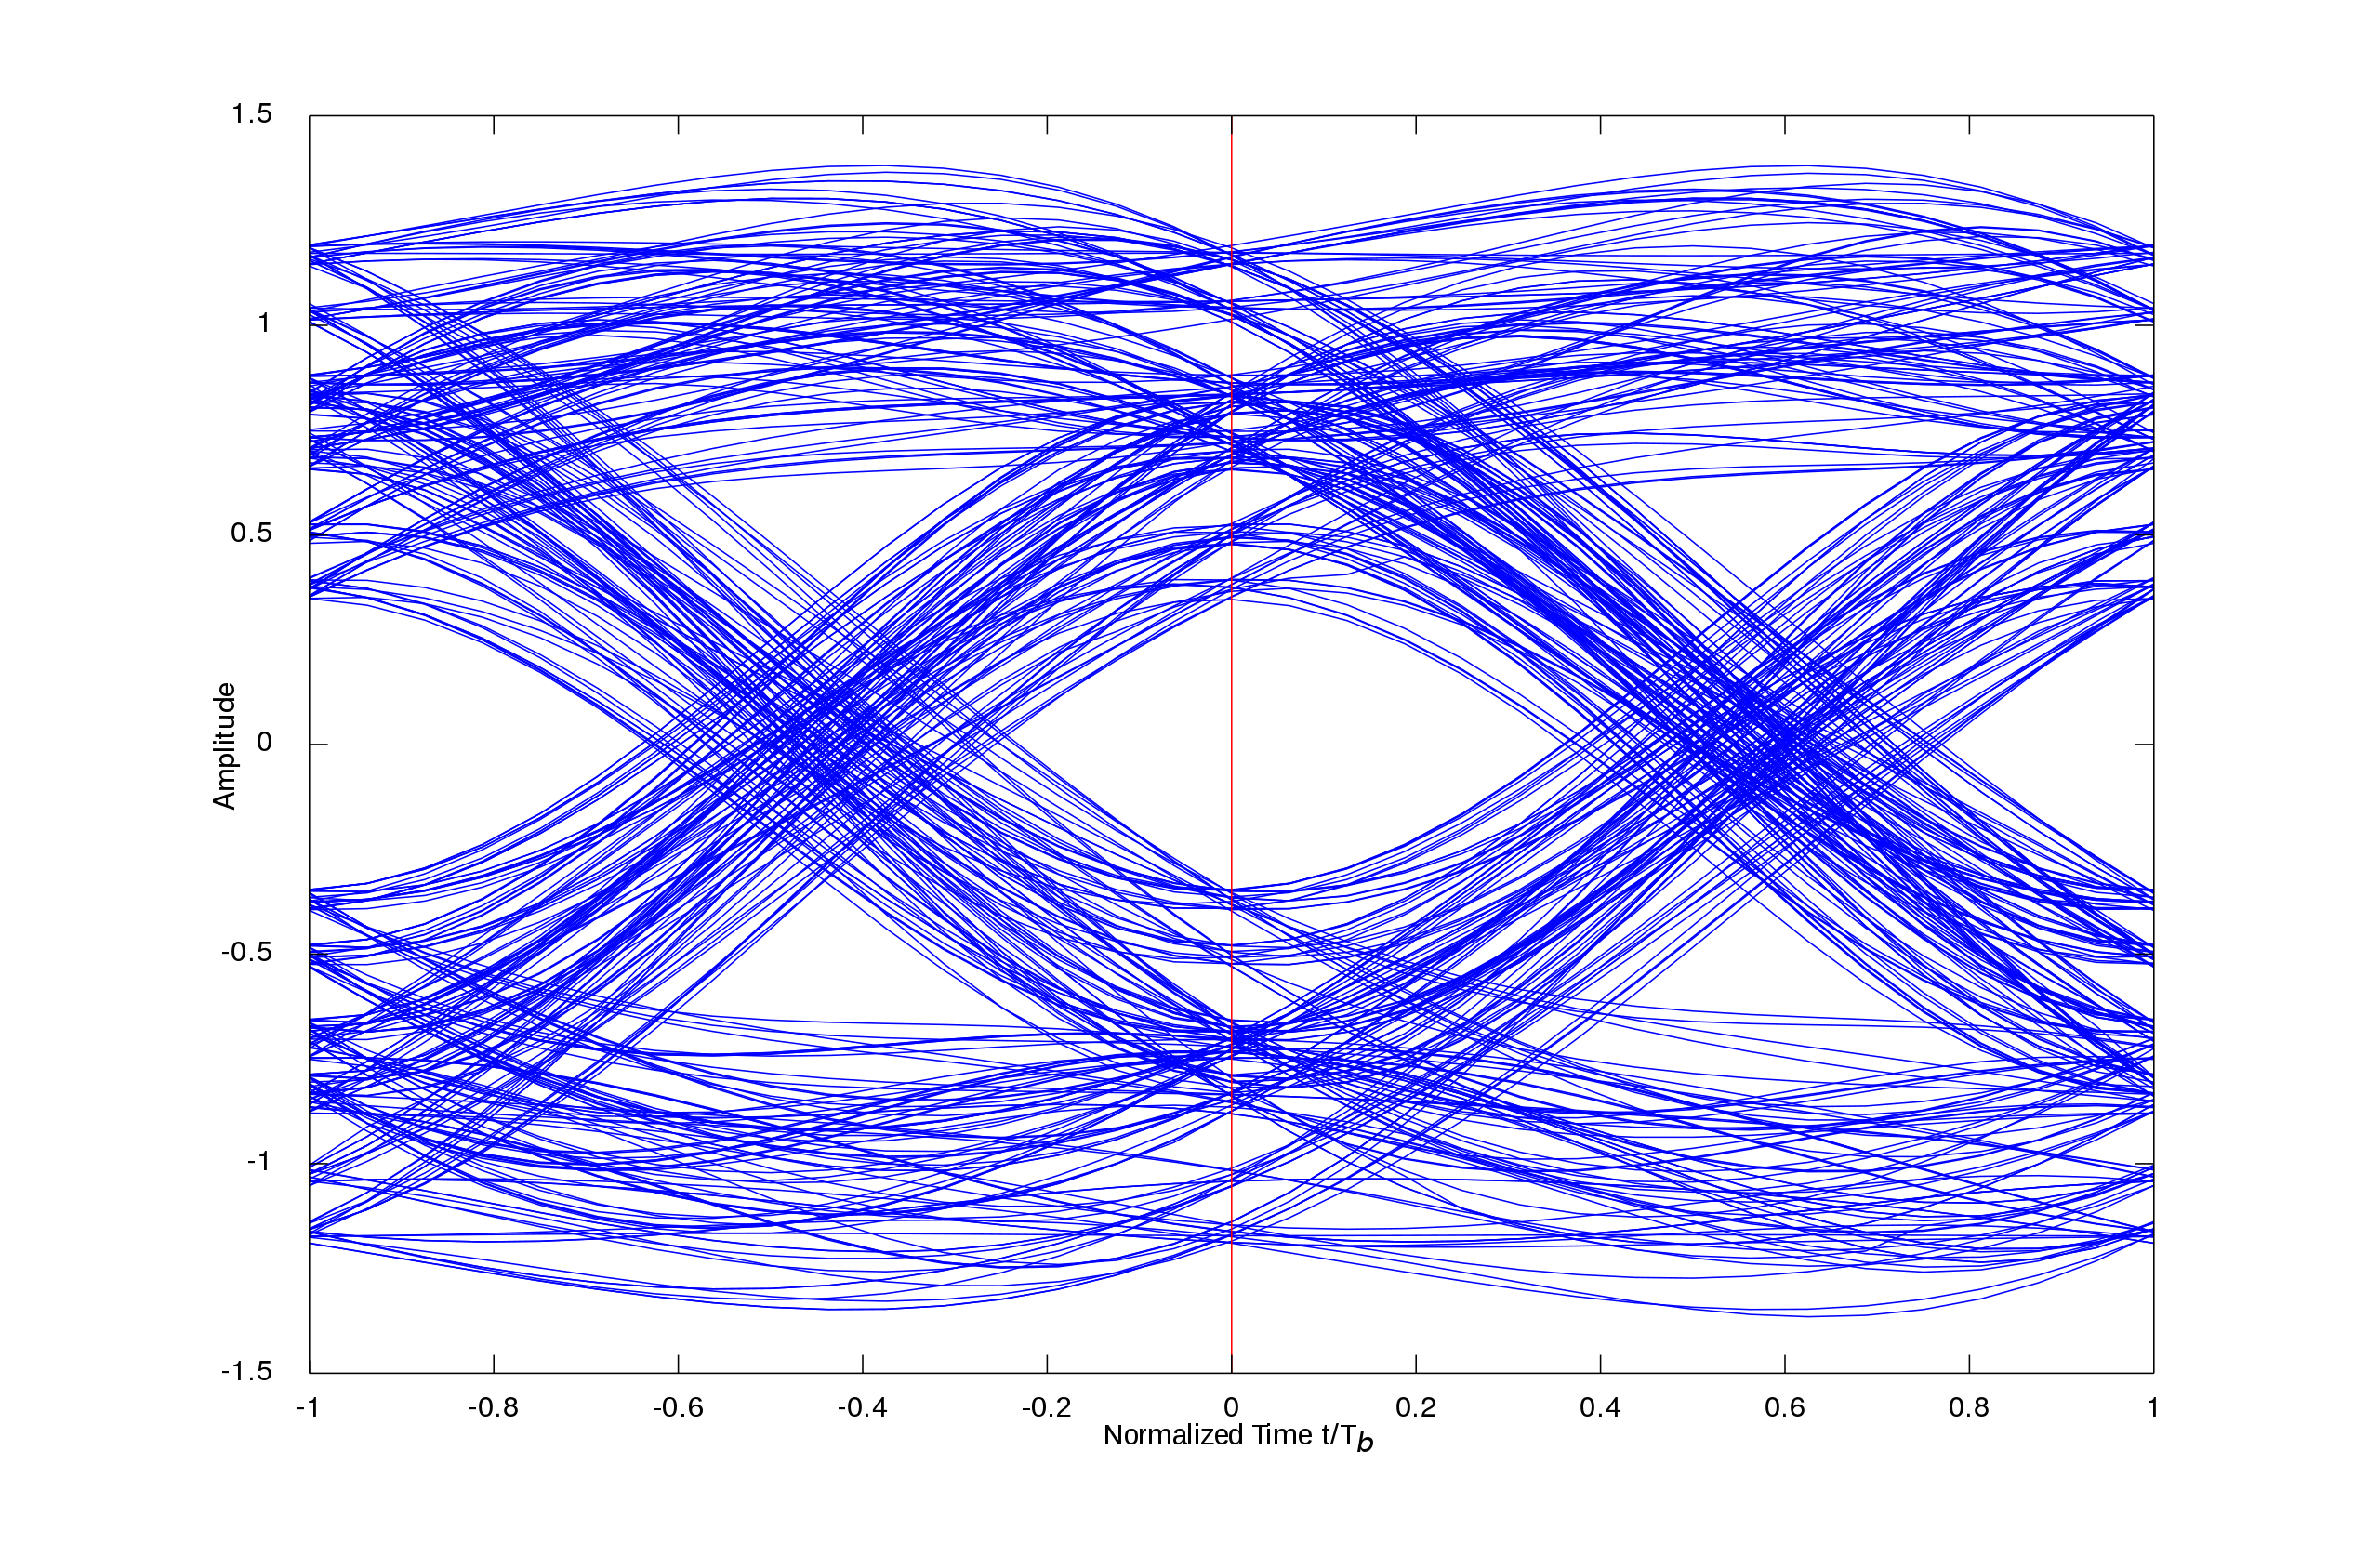

## Nyquist ISI Criterion

To achieve zero intersymbol interference, samples must have only one non-zero value at each sampling instant.

##The Rectangular Pulse

The simplest signal that avoids ISI is the rectangular pulse with width $T_{sym} = 1/F_{sym}$, but it consumes infinite bandwidth. This is because its Fourier transform (the sinc function) extends infinitely on either side of the spectrum.

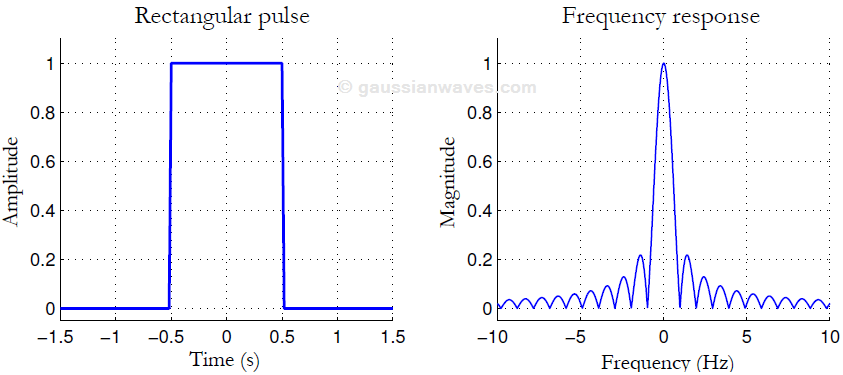

## The Sinc Pulse

The signal that avoids ISI with the least amount of bandwidth is the sinc pulse with bandwidth $F_{sym}/2$

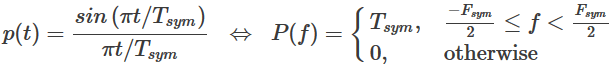

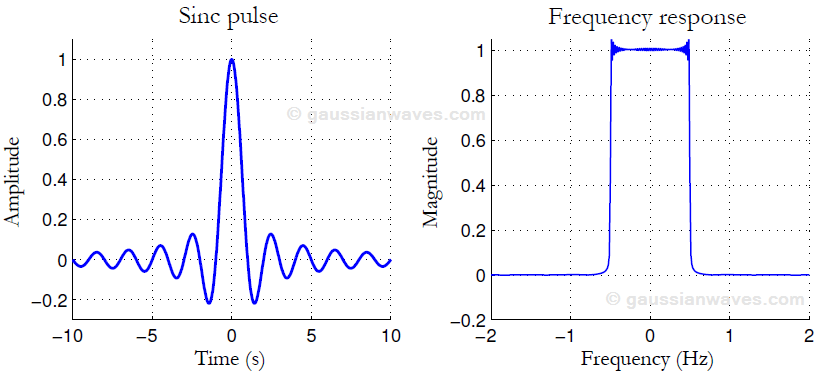

The major drawback of the sinc function is the slow decay rate, which can lead to ISI between symbols that are far apart.

The infinite impulse response makes it practically unrealizable.

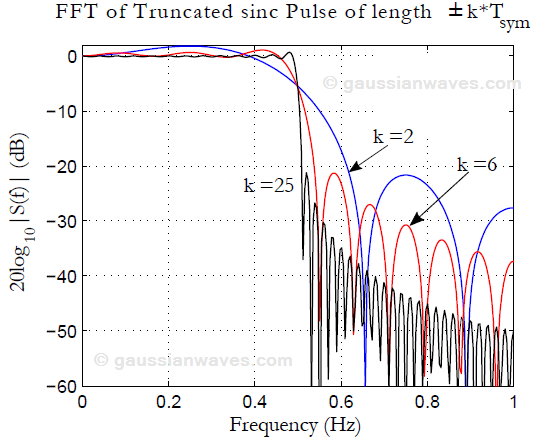

## Solutions

* Error Correcting Codes
* Adaptive Equalization
* Symbol Guard Periods
* Receiver Sequence Detector

# **Basic Pulse Shaping Using BPSK**

## BPSK Fundamentals

Using 1 bit per symbol is equivalent to transmitting square pulses.

BPSK is a square wave consisting of 1’s and 0's.

There are two phase levels:
* $0^{\circ}$ for binary $1$
* $180^{\circ}$ for binary $0$

bpsk.svg

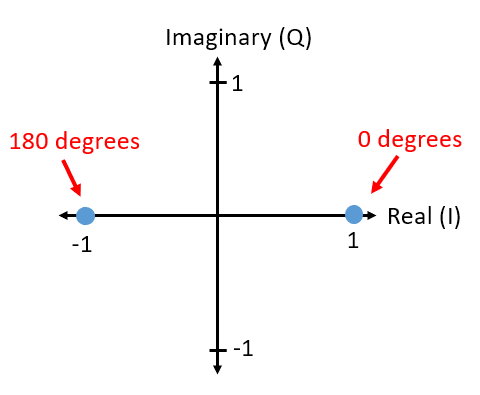

But square pulses are not efficient because they use an excess amount of spectrum.

## Square wave Fourier Transform

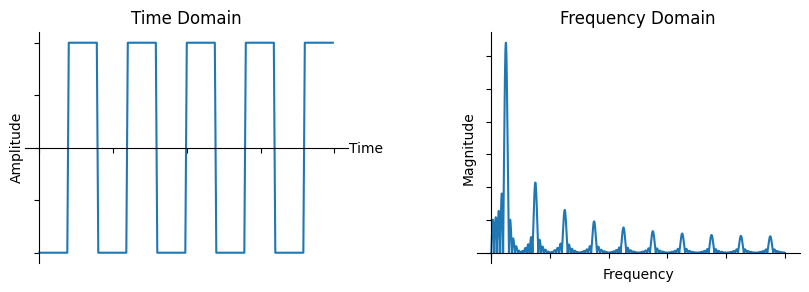

In [3]:
#######################
## Signal Generation ##
#######################

y = np.repeat(np.arange(10) % 2, 20) * 2 - 1  # Create a repeating square wave pattern
y = y.astype(float)
Y = np.abs(np.fft.rfft(y, 10000)) # Perform real-valued DFFT

#################
## Basic Plot  ##
#################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
plt.subplots_adjust(wspace=0.4)

ax1.plot(y)
ax1.text(len(y) + 10, -0.05, 'Time')
ax1.set_ylabel("Amplitude")
ax1.title.set_text('Time Domain')

ax2.plot(Y)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax2.title.set_text('Frequency Domain')

##################
## Fancy Format ##
##################

# set the x-spine
ax1.spines['left'].set_position('zero')
ax2.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()
ax2.spines['right'].set_color('none')
ax2.yaxis.tick_left()

# set the y-spine
ax1.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()
ax2.spines['top'].set_color('none')
ax2.xaxis.tick_bottom()

# Turn off tick numbering/labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

####################

plt.show()

We want to "shape" the blocky-looking symbols so that they take up less bandwidth in the frequency domain.

How?

## The Solution

Use a lowpass filter to discard the higher frequency components of our symbols.



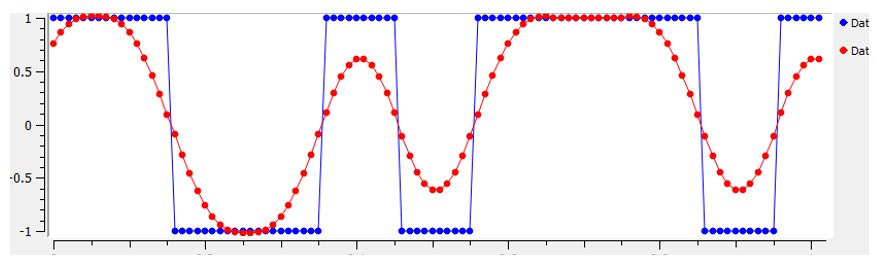

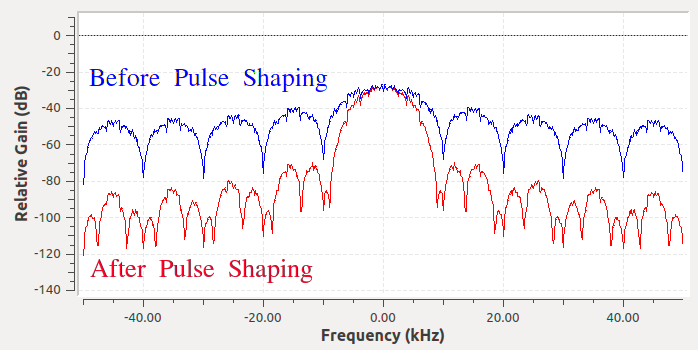

The sidelobes are ~30 dB lower after pulse shaping.

The main lobe is narrower, so less spectrum is used for the same amount of bits per second.

# **Pulse Shaping Theory**

## Filters and Symbol Timing

When we apply a pulse-shaping filter, it elongates the pulse in the time domain (in order to condense it in frequency).

This causes adjacent symbols to begin to overlap one another.

This is okay ***if*** all pulses but one add up to zero at every multiple of our symbol period *T*.

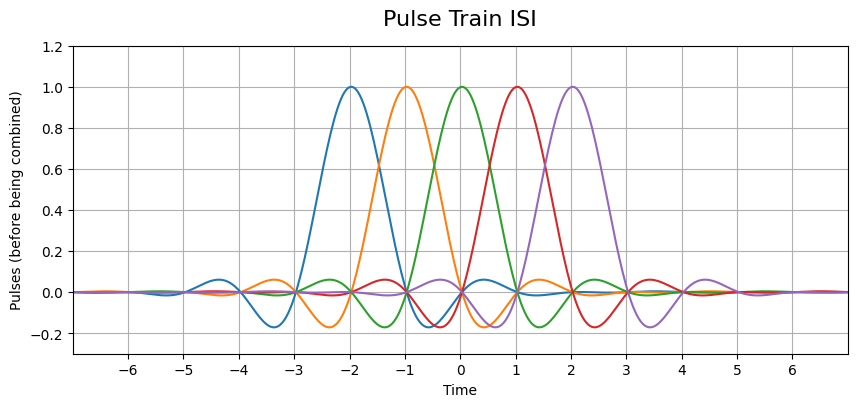

In [4]:
###################
### Pulse Train ###
###################


## Filter Creation ##

# Create our raised-cosine filter
num_taps = 1001
beta = 0.35

sps = 32
Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8

t = np.arange(num_taps//-2, num_taps//2) # remember it's not inclusive of final number
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)

## Basic Plot ##
N = 2000
fig, (ax) = plt.subplots(1, 1, figsize=(10, 4))
for delay in np.arange(-2,3):
    x = np.zeros(N)
    x[N//2 + delay*sps] = 1
    x_shaped = np.convolve(x, h, 'same')
    t = (np.arange(N) - N/2)/sps
    ax.plot(t, x_shaped, '-')

## Plot Settings ##
ax.axis([-7, 7, -0.3, 1.2])
ax.set_xlabel("Time")
ax.set_ylabel("Pulses (before being combined)")
ax.text(s="Pulse Train ISI", x=0,y=1.3, fontsize=16, fontweight='roman', horizontalalignment='center')

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
major_ticks = np.arange(-6, 7)
ax.set_xticks(major_ticks)

plt.grid(True)
plt.show()

At every interval *T*, one pulse peaks while the other pulses are at 0.

We want the receiver to sample the signal at the perfect time (at our pulse peaks), so it must synchronize with the symbol period (somehow).

</br>

*We only care about symbol alignment **at the receiver** when we perform our sampling.*

## Matched Filters

### Basic Concept

We (normally) want to low pass filter at the transmitter to reduce the amount of spectrum we use.

We also want to low pass filter at the receiver to elimate as much adjacent noise/interference next to the signal as possible.

</br>

Theoretically, the optimal linear filter for maximizing the SNR in the presence of AWGN is to use the same filter at both the Tx and Rx.

</br>
The receiver correlates the received signal with the known template signal.
</br>
The template signal is essentially the pulses the transmitter sends, irrespective of the phase/amplitude shifts applied to them.
</br>
Filtering is performed via convolution, and, in this case, correlation.

</br>

In matched filtering, we convolve the unknown signal with a conjugated time-reversed version of the template.

### Filter Splitting

So we split the pulse shaping filter between the transmit and receive sides.

splitting_rc_filter.svg

## Filter Design

Requirements:

*  Reduce our signal bandwidth (to use less spectrum)
*  All pulses except one should sum to zero at every symbol interval
*  Split the filter into TX and RX portions



# **Common Pulse-Shaping Filters**

Common pulse-shaping filters include:

* Sinc filter
* Raised-cosine filter
* Root raised-cosine filter
* Gaussian filter

</br>

</br>
Note that the sinc filter is equivalent to the raised-cosine filter when $\beta = 0$.
The sinc filter is an ideal filter as there is no transition region.

## Raised-Cosine Filter

The most popular pulse-shaping filter

3a84ae15bf1462dbad48595c4ce62d7c9e2f5f5a.svg

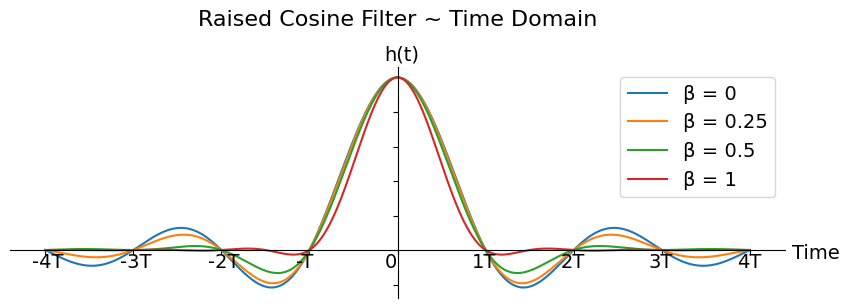

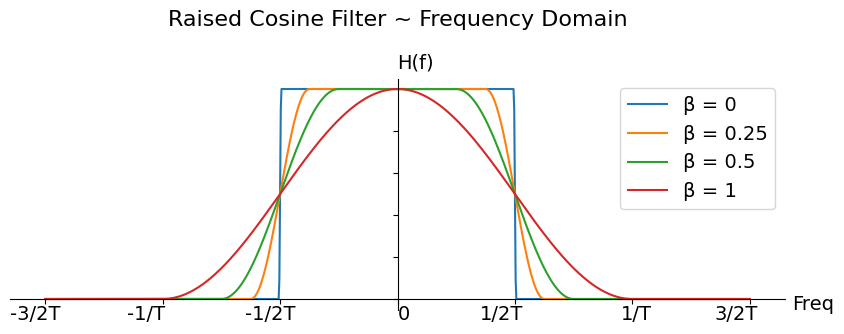

In [5]:
################
## Time Plot  ##
################

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 3))
plt.subplots_adjust(wspace=0.4)

sps = 100
t = np.linspace(-4 * sps, 4 * sps, 1000)
leg = []
for beta in [0, 0.25, 0.5, 1]:
    h = np.sinc(t / sps) * np.cos(np.pi * beta * t / sps) / (1 - (2 * beta * t / sps) ** 2)
    ax1.plot(t, h)
    leg.append('β = ' + str(beta))

plt.legend(leg, fontsize=14)
ax1.text(max(t) * 1.12, -0.05, 'Time', fontsize=14)
ax1.text(-4 * sps - 15, -0.1, '-4T', fontsize=14)
ax1.text(-3 * sps - 15, -0.1, '-3T', fontsize=14)
ax1.text(-2 * sps - 15, -0.1, '-2T', fontsize=14)
ax1.text(-1 * sps - 15, -0.1, '-T', fontsize=14)
ax1.text(0 * sps - 15, -0.1, '0', fontsize=14)
ax1.text(1 * sps - 15, -0.1, '1T', fontsize=14)
ax1.text(2 * sps - 15, -0.1, '2T', fontsize=14)
ax1.text(3 * sps - 15, -0.1, '3T', fontsize=14)
ax1.text(4 * sps - 15, -0.1, '4T', fontsize=14)
ax1.text(-15, 1.1, 'h(t)', fontsize=14)

# set the x-spine (see below for more info on `set_position`)
ax1.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()

# set the y-spine
ax1.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()

# Turn off tick numbering/labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax1.text(s='Raised Cosine Filter ~ Time Domain', x=0, y=1.3, fontsize=16, fontweight='roman', horizontalalignment='center')
plt.show()


#####################
## Frequency Plot  ##
#####################

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 3))
plt.subplots_adjust(wspace=0.4)

sps = 100
leg = []
for beta in [0.01, 0.25, 0.5, 1]:
    f = np.linspace(-1.5 / sps, 1.5 / sps, 1000)
    H = []
    for fi in f:
        if np.abs(fi) <= (1 - beta) / 2 / sps:
            H.append(1)
        elif (np.abs(fi) <= (1 + beta) / 2 / sps) and (np.abs(fi) > (1 - beta) / 2 / sps):
            H.append(0.5 * (1 + np.cos(np.pi * sps / beta * (np.abs(fi) - (1 - beta) / (2 * sps)))))
        else:
            H.append(0)
    ax1.plot(f, H)
    if beta == 0.01:
        beta = 0
    leg.append('β = ' + str(beta))

plt.legend(leg, fontsize=14)
ax1.text(max(f) * 1.12, -0.05, 'Freq', fontsize=14)
ax1.text(-1.5 / sps - 0.0015, -0.1, '-3/2T', fontsize=14)
ax1.text(-1 / sps - 0.0015, -0.1, '-1/T', fontsize=14)
ax1.text(-0.5 / sps - 0.0015, -0.1, '-1/2T', fontsize=14)
ax1.text(0, -0.1, '0', fontsize=14)
ax1.text(1.5 / sps - 0.0015, -0.1, '3/2T', fontsize=14)
ax1.text(1 / sps - 0.0005, -0.1, '1/T', fontsize=14)
ax1.text(0.5 / sps - 0.0015, -0.1, '1/2T', fontsize=14)
ax1.text(0, 1.1, 'H(f)', fontsize=14)

# set the x-spine (see below for more info on `set_position`)
ax1.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()

# set the y-spine
ax1.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()

# Turn off tick numbering/labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax1.text(s='Raised Cosine Filter ~ Frequency Domain', x=0, y=1.3, fontsize=16, fontweight='roman', horizontalalignment='center')
plt.show()

The $\beta$ parameter is the only parameter for the raised-cosine filter, and it determines how quickly the filter tapers off in the time domain, which will be inversely proportional with how quickly it tapers off in frequency.

</br>

The reason it’s called the raised-cosine filter is because the frequency domain when $\beta$ = 1 is a half-cycle of a cosine wave, raised up to sit on the x-axis.

In [6]:
@interact(beta=(0.0,1.0,0.01),n_taps=(1, 300, 1))
def rrc_filter(beta = 0.35, n_taps = 101):
    Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
    t = np.arange(n_taps) - (n_taps-1)//2
    h = 1/Ts*np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
    plt.figure(1)
    plt.plot(t, h, '.')
    plt.plot(t, h, alpha=0.5)
    plt.title("Raised-Cosine Filter")
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.35, description='beta', max=1.0, step=0.01), IntSlider(value=101, de…

## Square-Root Raised-Cosine Filter

The equally split filter portion of the TX/RX raised-cosine filter.

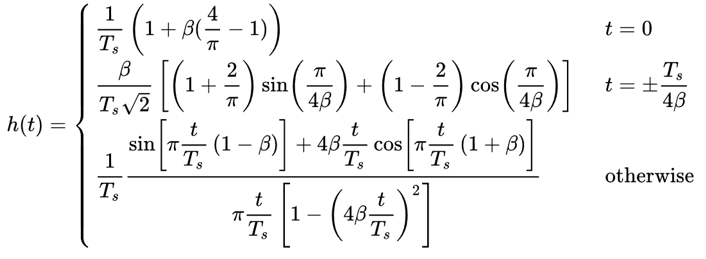

## Raised-Cosine Roll-Off Factor

$\beta$ is called the "roll-off" factor or "excess bandwidth."

It determines how fast (in the time domain) the filter rolls off to zero.

It is a number between 0 and 1.

More taps are required to lower $\beta$.

The lower the roll-off, the more compact the frequency of the signal for a given symbol rate.

</br>

Bandwidth can be approximated for a given symbol rate and roll-off factor as:

$BW = R_s(\beta + 1)$, where $R_s$ is the symbol rate in Hz.

# **Advanced BPSK Pulse Shaping**

BPSK involves transmissitng 1's and -1's with the "Q" portion equal to zero, so we only need to plot the in-phase portion.

This is equivalent to bipolar 2-ASK, as a 180$^{\circ}$ phase shift is equivalent to multiplying the sinusoid by -1.

## The Impulse Train

An Example Generated Setup:

```
bits: [0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
BPSK symbols: [-1, -1, 1, 1, 1, 1, -1, -1, 1, 1]
Applying 8 samples per symbol: [-1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...]
```

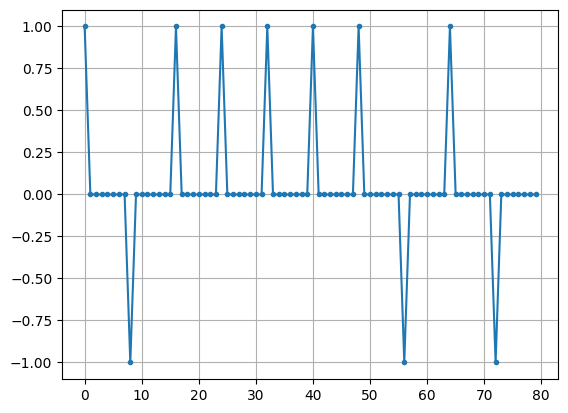

In [7]:
########################
### Impulse Response ###
########################

num_symbols = 10
sps = 8

# Transmission data of 1's and 0's
bits = rng.integers(0, 2, num_symbols)

x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    x = np.concatenate((x, pulse)) # add the 8 samples to the signal
plt.figure(0)
plt.plot(x, '.-')
plt.grid(True)
plt.show()

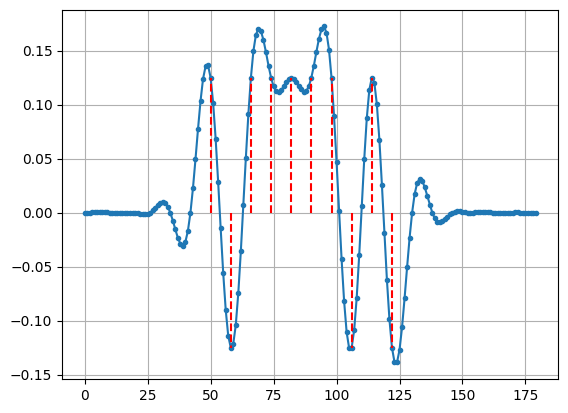

In [8]:
##########################
## Transmit Filter Plot ##
##########################

# Create our raised-cosine filter
num_taps = 101
beta = 0.35
Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = np.arange(num_taps) - (num_taps-1)//2
h = 1/Ts*np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)


# Filter our signal, in order to apply the pulse shaping
x_shaped = np.convolve(x, h)
plt.figure(1)

# Plot filtered signaal with sample points
plt.plot(x_shaped, '.-')

# Mark the Ts intervals
for i in range(num_symbols):
    plt.plot([i*sps+num_taps//2,i*sps+num_taps//2], [0, x_shaped[i*sps+num_taps//2]], '--', color = 'red')
plt.grid(True)
plt.show()

## BPSK in GNU Radio

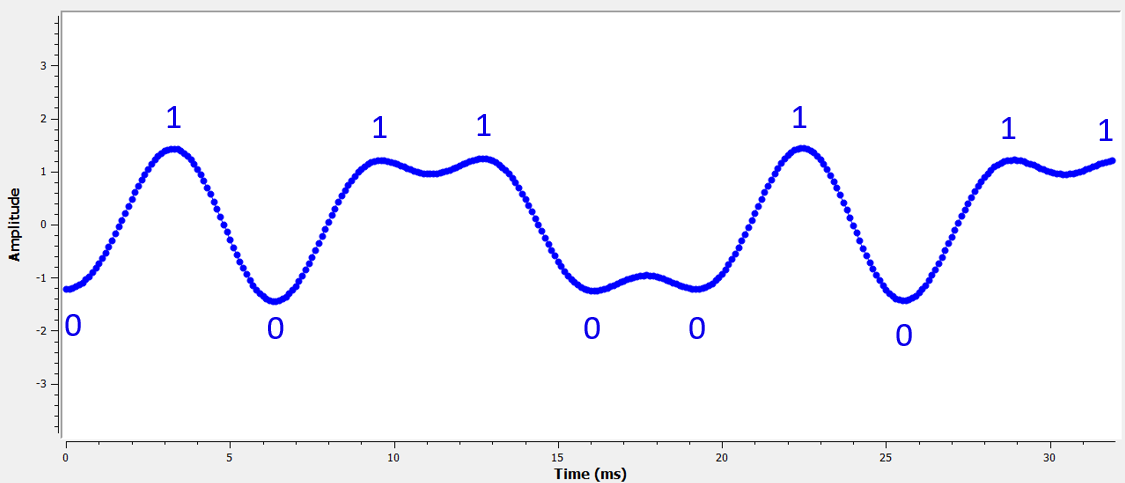

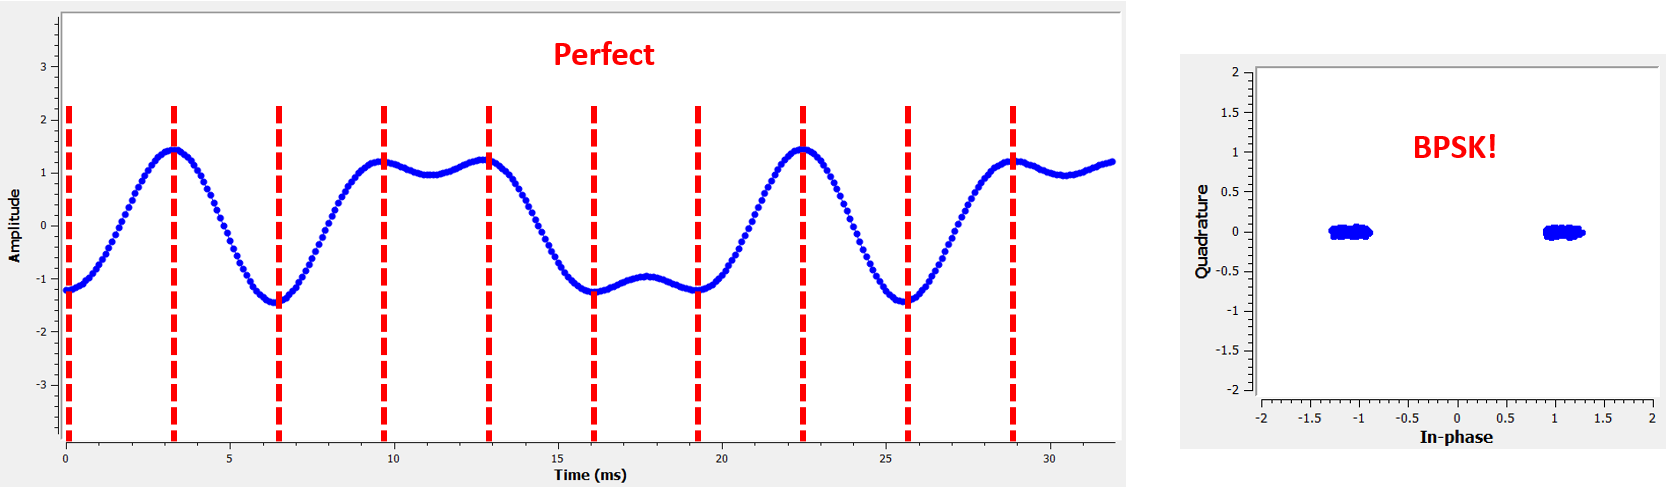

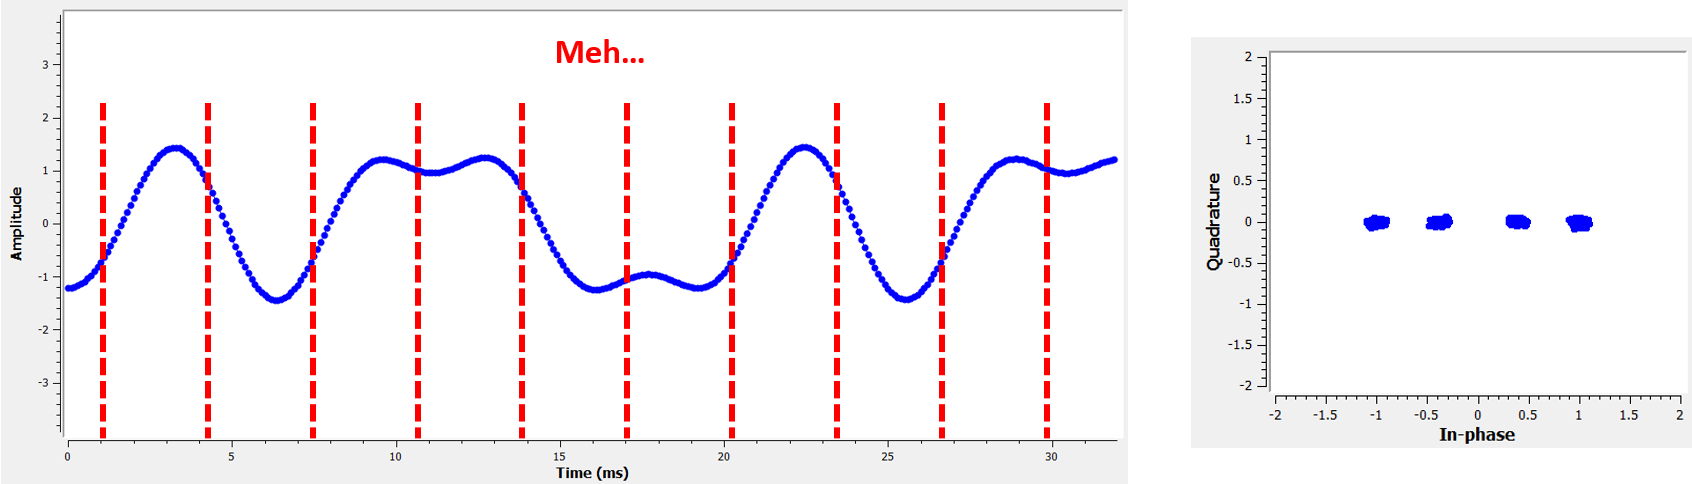

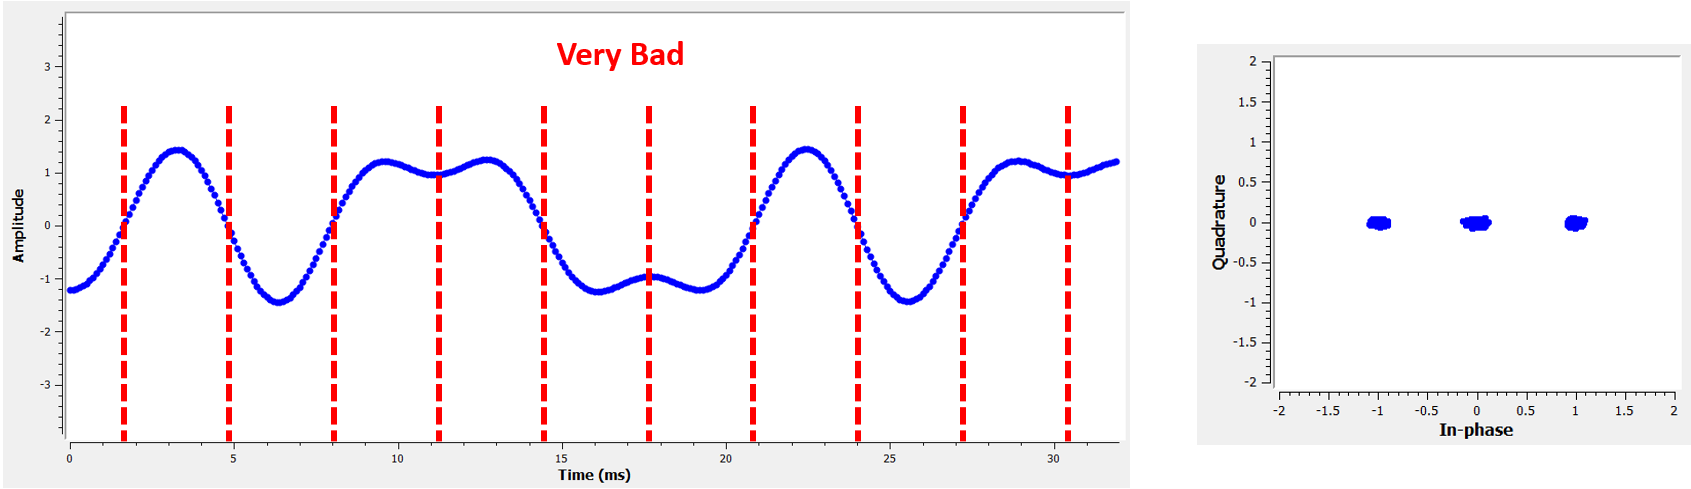